## Weather Analysis for Chicago Temperature and Global Temperature

## Table of Contents

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id="#intro"></a>
## Introduction

> I chose the weather_chicago and weather_global dataset. As a personal study, I sought out to find the average temperature and rolling temperature for global and local(Chicago). I want to see was that affect globally or locally to greenhouses.

## Exploratory Data Analysis

In [31]:
# import all functions which would help me to get correct analysis
import pandas as pd
import numpy as np
from IPython.display import Image


%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#import CSV file 
df_g = pd.read_csv("./weather_global.csv")
df_c = pd.read_csv("./weather_chicago.csv")

In [3]:
# Getting rollinging avg. value for global weather data set
roll_avg = df_g['avg_temp'].rolling(50).mean()


In [4]:
# inserting new colmun as moving avg.
df_g.insert(2, 'ma', roll_avg)

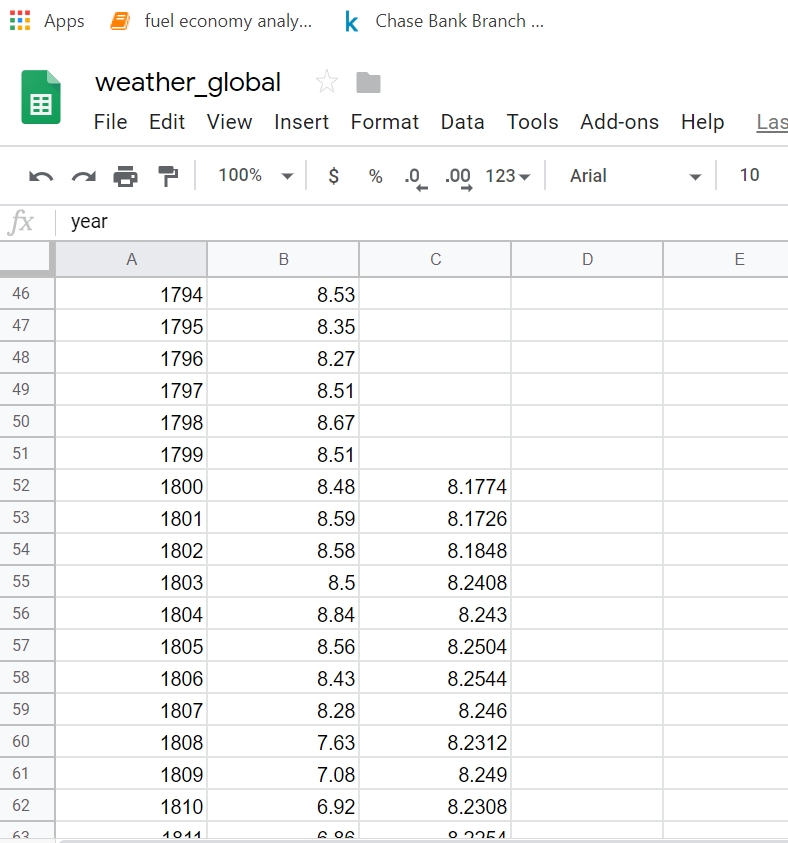

In [29]:
# import the screenshot Image for varification
Image(filename='./Global_weather.PNG')

In [5]:
# Cleaning Data and droping null value from updated dataframe
df_1 = df_g.dropna()


In [6]:
# Export new data to ".csv" file
df_1.to_csv('./global_final.csv', index=False)


In [7]:
# callback upadated dataframe
df = pd.read_csv('./global_final.csv')

In [8]:
# Convert Celsius to Fahrenheit and  
# formula is (0°C × 9/5) + 32 = 32°F
df.avg_temp = df.avg_temp.apply(lambda x: x*(9/5) + 32)
df.ma = df.ma.apply(lambda x: x*(9/5) + 31)




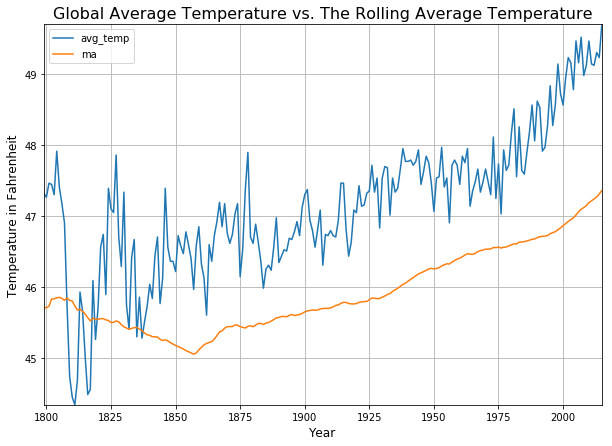

In [9]:
# visualisation for global avg. temp. and moving temp. 
plt.subplots = True
df.plot.line(x='year', y=['avg_temp', 'ma'], figsize=(10,7), grid=True)
plt.title("Global Average Temperature vs. The Rolling Average Temperature", fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature in Fahrenheit', fontsize=12)
plt.margins(0)
plt.show()


### Calculate and plot the average temperature vs. the rolling average temperature for Chicago across a period of 200 years


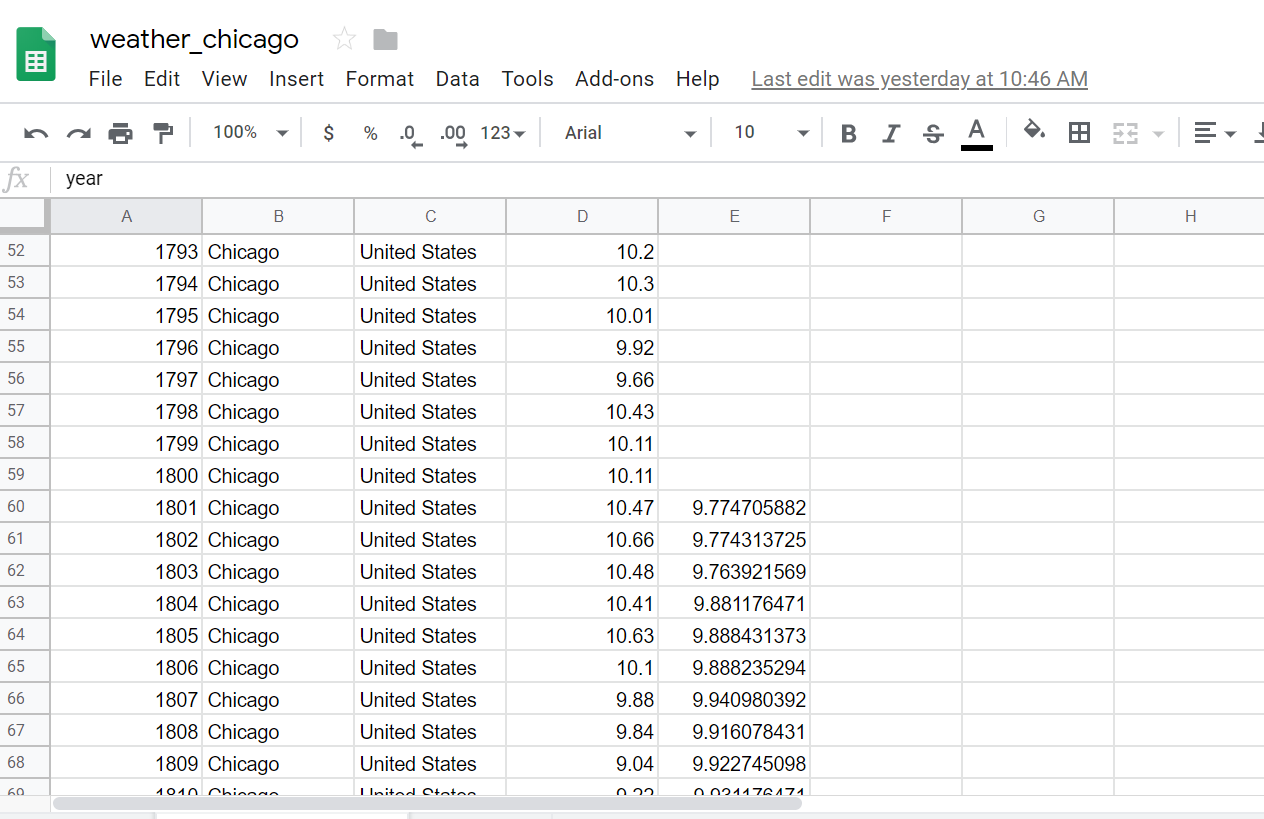

In [30]:
# import the screenshot Image for varification
Image(filename='./chicago_weather.PNG')

In [10]:
# Clean the data with null values
df_c.dropna(inplace=True)

In [11]:
# as I want to start my calculation from year 1750, I drop all data before that year
df_c.drop(df_c.query('year < 1750').index, inplace=True)
df_c.reset_index(drop=True, inplace=True)
df_c.head()

In [13]:
# Getting rollinging avg. value for local(Chicago) weather data set
roll_avg_chicago = df_c['avg_temp'].rolling(50).mean()


In [14]:
# inserting new colmun as moving avg.
df_c.insert(2, 'ma', roll_avg_chicago)

In [15]:
# Cleaning Data and droping null value from updated dataframe
df_2 = df_c.dropna()

In [16]:
# Export new data to ".csv" file
df_2.to_csv('./chicago_final.csv', index=False)


In [17]:
# callback upadated dataframe
df_chicago = pd.read_csv('./chicago_final.csv')

In [18]:
# Convert Celsius to Fahrenheit and  
# formula is (0°C × 9/5) + 32 = 32°F
df_chicago.avg_temp = df_chicago.avg_temp.apply(lambda x: x*(9/5) + 32)
df_chicago.ma = df_chicago.ma.apply(lambda x: x*(9/5) + 31)

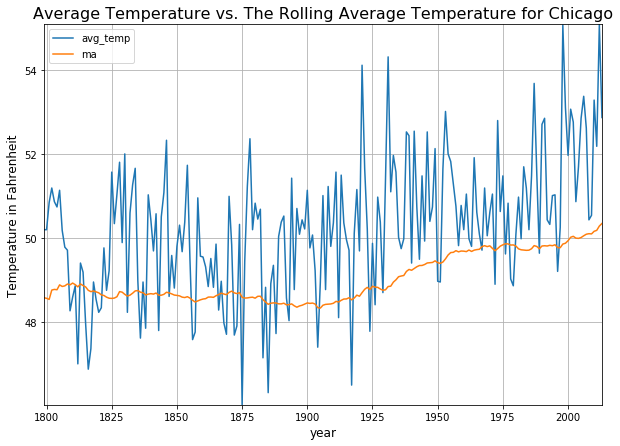

In [19]:
# visualisation for local(Chicago) avg. temp. and moving temp. 
plt.subplots = True
df_chicago.plot.line(x='year', y=['avg_temp', 'ma'], figsize=(10,7), grid=True)
plt.title("Average Temperature vs. The Rolling Average Temperature for Chicago", fontsize=16)
plt.xlabel('year', fontsize=12)
plt.ylabel('Temperature in Fahrenheit', fontsize=12)
plt.margins(0)
plt.show()


### Calculate and plot the difference between the pure average temperature over a period of 200 years vs. the rolling average temperature over a period of 200 years between global and local(Chicago) weather.

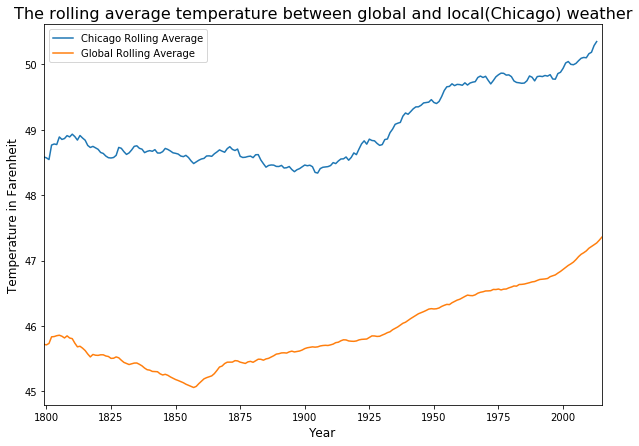

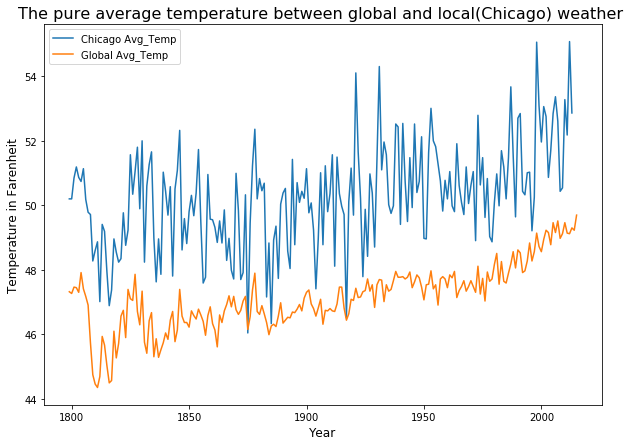

In [22]:
ax = df_chicago.plot(x='year', y='ma', figsize=(10,7))
df.plot(x='year', y='ma',ax=ax)

plt.subplots =True
plt.title('The rolling average temperature between global and local(Chicago) weather', fontsize=16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Temperature in Farenheit', fontsize = 12)

ax2 = df_chicago.plot(x='year', y='avg_temp', figsize=(10,7), sharex=ax, label='Chicago Avg_Temp' )
df.plot(x='year', y='avg_temp',ax=ax2, label='Global Avg_Temp')

ax.legend(labels=['Chicago Rolling Average', 'Global Rolling Average'])
ax.margins(x=0)
plt.title("The pure average temperature between global and local(Chicago) weather ", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Temperature in Farenheit", fontsize=12)
plt.show()









## Conclusion

1. <p>According to data, the Greenhouse effect is there, as we can see in this data the moving average temperature for Chicago or Global it is increasing in every 50 years of time span.  
</p>
2. <p>According to data Chicago's average temperature is very fluctuating and since 1925 it's smoothly increasing as a moving average temperature.</p>
3. <p>As per data Global average temperature is gradually increasing over the 50 years od time span.</p>